<a href="https://colab.research.google.com/github/twumm/Intro-To-Python/blob/main/CSC_7002_Intro_NLP_12_3_to_12_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to NLP (Sections 12.3–12.7)

We will cover:

1. **12.3** Visualizing word frequencies (bar chart + word cloud)  
2. **12.4** Readability (how “easy” a text is to read)  
3. **12.5** Named Entity Recognition (NER) with spaCy  
4. **12.6** Similarity Detection (how similar two texts are)  
5. **12.7** Quick tour of other NLP libraries

---


In [13]:
!pip -q install nltk textblob spacy wordcloud textatistic pandas matplotlib
!python -m spacy download en_core_web_sm

import re # Regular Expressions - to search, clean, and manipulate text using patterns
from collections import Counter # a special dictionary for counting items automatically

import pandas as pd
import matplotlib.pyplot as plt

import nltk # natural language toolkit for
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

try:
  from textatistic import Textatistic # readability analysis
except Exception as e:
  Textatistic = None
  print("textatistic not available:", e)

try:
  import spacy # nltk on steroids
  nlp = spacy.load("en_core_web_sm")
except Exception as e:
  nlp = None
  print("spaCy model not loaded. If needed run: python -m spacy download en_core_web_sm")
  print("Error:", e)

nltk.download("punkt", quiet=True) # where sentences begin and end
nltk.download("gutenberg", quiet=True)
nltk.download("stopwords", quiet=True)

print("Setup complete")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Setup complete


## 1) Data sample

*Shakespeare’s Hamlet*


In [2]:

raw_text = gutenberg.raw("shakespeare-hamlet.txt")

text = raw_text[:12000]

print("Characters:", len(text))
print("\nPreview:\n")
print(text[:500])


Characters: 12000

Preview:

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not


---

# 12.3 Visualizing Word Frequencies

- **Bar chart** of the top words
- **Word cloud** of frequent words

### Steps
1. Clean and tokenize
2. Remove stop words (like *the, and, is*)
3. Count words
4. Plot results


In [32]:
import nltk
nltk.download('punkt_tab')

stop_words = set(stopwords.words("english"))
print(stop_words)

def simple_clean_and_tokenize(s):
  s = s.lower()
  s = re.sub(r"[^a-z\s']", " ", s) # keep letters/spaces/apostrophes
  s = re.sub(r"\s+", " ", s).strip()
  tokens = word_tokenize(s)
  tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
  return tokens

tokens = simple_clean_and_tokenize(text)

print("Total tokens (after stop-word removal):", len(tokens))
print("Sample tokens:", tokens[:20])


{'all', 'after', 'no', 'each', 'do', 'ours', 'their', 'doesn', 'had', 'didn', 'herself', 'then', 'o', 'until', 'before', 'can', 'both', 'her', 'myself', 'wasn', 'not', 'where', 'but', 'too', 'should', "should've", 'so', "we're", 'has', 'wouldn', 'weren', 'because', 'out', 'this', 'won', 'isn', 'in', 'more', 'below', 'most', "mustn't", 'off', 'only', 'is', 'he', 'such', 'once', 'what', "needn't", 'than', 'just', 'these', 'under', 'mightn', "we'd", "i'd", 'him', "doesn't", 'the', 'when', 'while', 'who', 'nor', 'was', 's', 'our', 'up', 'themselves', 'y', "they'd", 'doing', 'over', 'yourself', "hasn't", "we've", 'his', "you're", 'why', 'into', "they're", "she'd", 'above', 'shouldn', 'will', 'a', 'hers', "mightn't", 'she', "won't", 'how', "aren't", "it'll", "he's", 'himself', 'here', "you've", 'shan', "couldn't", "don't", 'does', 'there', 'those', 'from', 'down', 'hasn', 'you', "it'd", "isn't", 'to', 'any', 'i', 'we', "it's", 't', "she'll", 'with', 'are', 'during', 'they', 'own', "she's", '

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Top 20 words


In [15]:

counts = Counter(tokens)
# print(counts)
top20 = counts.most_common(20)
# print(top20)

df_top20 = pd.DataFrame(top20, columns=["word", "count"])
df_top20
# print(df_top20)


,word,count
0,mar,17
1,king,14
2,haue,14
3,hor,14
4,speake,14
5,thy,11
6,barn,10
7,hamlet,9
8,horatio,9
9,hath,9


### Bar chart (Top 20 words)

A bar chart makes the frequency differences easy to see.


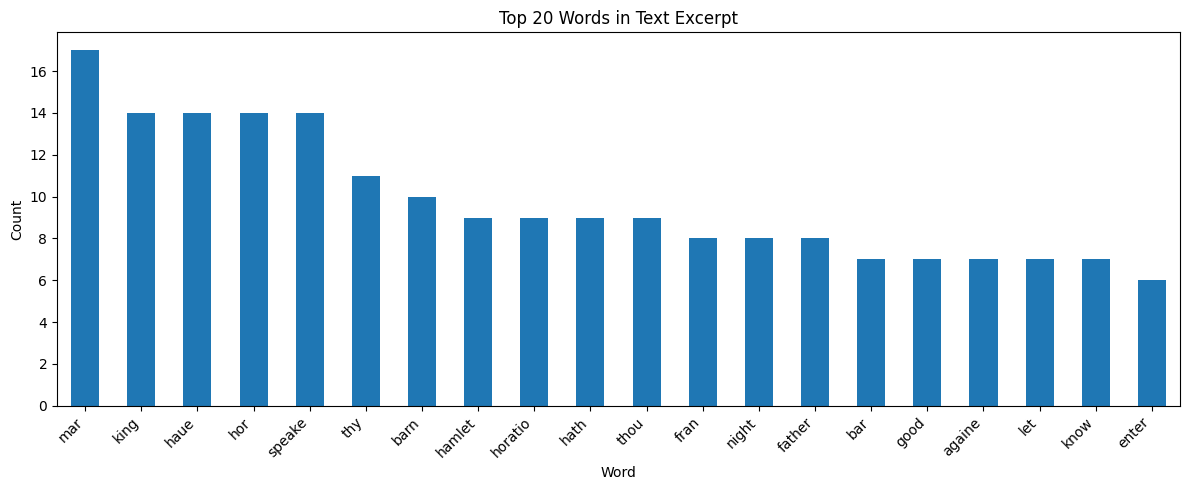

In [16]:

ax = df_top20.plot(kind="bar", x="word", y="count", legend=False, figsize=(12, 5))
ax.set_title("Top 20 Words in Text Excerpt")
ax.set_xlabel("Word")
ax.set_ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Word Cloud

A word cloud is a fast “at-a-glance” visualization:
- bigger words = more frequent


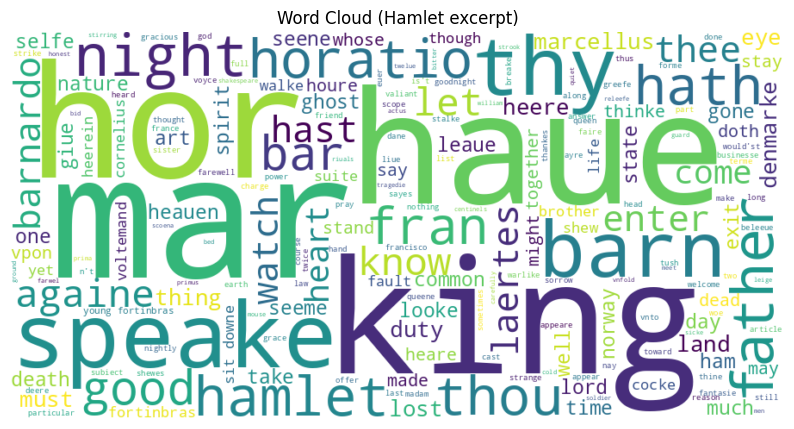

In [18]:

text_for_cloud = " ".join(tokens)

wc = WordCloud(width=900, height=450, background_color="white").generate(text_for_cloud)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud (Hamlet excerpt)")
plt.show()


---

# 12.4 Readability

Readability answers: **How easy is this text to read?**

Textastic helps to compute common readability scores like:
- **Flesch Reading Ease**
- **Flesch–Kincaid Grade Level**

Interpretation (roughly):
- Higher Flesch score → easier to read
- Higher grade level → harder text


In [19]:

if Textatistic is None:
  print("Install with: pip install textatistic")
else:
  stats = Textatistic(text)
  print("Flesch Reading Ease:", stats.flesch_score)
  print("Flesch-Kincaid Grade:", stats.fleschkincaid_score)
  print("Dale-Chall Score:", stats.dalechall_score)


Flesch Reading Ease: 91.3502374336954
Flesch-Kincaid Grade: 4.109936852740592
Dale-Chall Score: 9.415343394796666


---

# 12.5 Named Entity Recognition (NER) with spaCy

NER finds **real-world entities** like:
- people (PERSON)
- organizations (ORG)
- places (GPE)
- dates (DATE)

We’ll run spaCy on a short piece of text and list the entities it finds.


In [25]:

sample_ner_text = (
  "Barack Obama visited New York City in 2016. "
  "Apple is based in Cupertino, California. "
  "William Shakespeare wrote Hamlet."
  "Sheeba is my instructor"
)

if nlp is None:
  print("spaCy model not available. Install model: python -m spacy download en_core_web_sm")
else:
  doc = nlp(sample_ner_text)
  entities = [(ent.text, ent.label_) for ent in doc.ents]
  pd.DataFrame(entities, columns=["entity", "label"])


                entity        label
0         Barack Obama       PERSON
1        New York City          GPE
2                 2016         DATE
3                Apple          ORG
4            Cupertino          GPE
5           California          GPE
6  William Shakespeare       PERSON
7               Hamlet  WORK_OF_ART
8               Sheeba         NORP


### Why NER is useful (quick talking points)
- Extract structured facts from messy text
- Helps with search (e.g., “find all cities mentioned”)
- Useful in news, resumes, legal documents, customer feedback


---

# 12.6 Similarity Detection (spaCy)

Similarity answers: **How similar are two texts?**  
This can help with:
- duplicate detection
- clustering similar documents
- basic recommendations (“more like this”)

We’ll compare two short sentences and see the similarity score.

> Note: the small spaCy model (`en_core_web_sm`) has limited vectors, so similarity is a “quick demo,” not perfect.


In [26]:

text_a = "I loved the movie. The acting was great and the story was fun."
text_b = "This film was amazing. Great performances and an entertaining plot."
text_c = "My laptop battery died and the screen flickers."

if nlp is None:
  print("spaCy model not available.")
else:
  doc_a = nlp(text_a)
  doc_b = nlp(text_b)
  doc_c = nlp(text_c)

  print("Similarity(A, B):", doc_a.similarity(doc_b))
  print("Similarity(A, C):", doc_a.similarity(doc_c))


Similarity(A, B): 0.7436704039573669
Similarity(A, C): 0.6075119376182556


/tmp/ipython-input-203/1163040866.py:12: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print("Similarity(A, B):", doc_a.similarity(doc_b))
/tmp/ipython-input-203/1163040866.py:13: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, 

---

# 12.7 Other NLP Libraries (quick tour)

Used
- **NLTK** (datasets + tokenization + stop words)
- **spaCy** (industrial-grade NLP: NER, pipelines, etc.)
- **WordCloud** (visualization)
- **Textatistic** (readability)

Other popular choices:
- **Gensim**: topic modeling (LDA), word vectors
- **scikit-learn**: classic ML for text (TF-IDF + classifiers)
- **Hugging Face Transformers**: modern deep learning models (BERT, GPT-style)
- **fastText**: efficient word vectors and language identification

### What's next?
- Start with **NLTK** for learning basics.
- Use **spaCy** when you want fast, production-friendly NLP.
- Use **Transformers** when you need the best accuracy (and have compute).
